# Solution sketch, lab 7

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt

#new packages
import statsmodels as sms
import statsmodels.formula.api as smf
import seaborn as sns




### 1. Running a simple regression
    
In Penn World tables data ("http://jmaurit.github.io/anv_statistikk/data/pwt100.csv") consider the relationship between average hours worked for employed persons (avh) and real per capita GDP in 2019 (rgdpe/pop). 

- Run a simple regression of average hours worked on rgdpe with statsmodels
- plot the data with the regression line overlayed
- What is the 95% confidence interval of the relationship? 
- What is the estimated $\sigma$ of the model?
- Briefly discuss whether you think the relationship is causal? 

In [8]:
pwt = pd.read_csv("http://jmaurit.github.io/anv_statistikk/data/pwt100.csv", sep=";", decimal=",")
pwt["rgdpe_per_capita"] = pwt["rgdpe"]/pwt["pop"]
pwt2019 = pwt.loc[pwt.year==2019, :]

In [9]:
ex_mod1 = smf.ols(formula='rgdpe_per_capita~avh', data=pwt2019).fit()
ex_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rgdpe_per_capita   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     21.78
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           1.61e-05
Time:                        11:22:41   Log-Likelihood:                -745.28
No. Observations:                  66   AIC:                             1495.
Df Residuals:                      64   BIC:                             1499.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.142e+05    1.7e+04      6.732      0.000    8.03e+04    1.48e+05
avh          -42.3617      9.078     -4.666      0.000     -60.497     -24.227
==============================================================================
Omnibus:                       34.079   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.123
Skew:                           1.675   Prob(JB):                     6.59e-18
Kurtosis:                       7.189   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have a negative and statistically significant relationship

I'll use seaborn lmplot to give a quick visualisation of the regression line: 

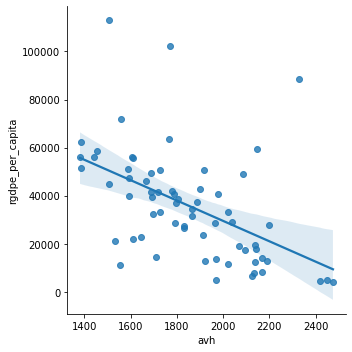

In [10]:
sns.lmplot(x="avh", y="rgdpe_per_capita", data=pwt2019)

In [ ]:
pwt2019

The 95 % confidence interval is displayed in the summary output, but we can also quickly make the calculation ourselves:



In [8]:
ex1_cov = ex_mod1.cov_params()
SE_b = np.sqrt(ex1_cov.iloc[1,1])


CI = [ex_mod1.params[1] -2*SE_b, ex_mod1.params[1] +2*SE_b]
CI

[-60.5175164514408, -24.205978222312357]

We can see that there is quite a bit of variation around the regression line. We can get the estimate for the $\sigma$

In [10]:
np.sqrt(ex_mod1.mse_resid)

19705.147498247465

Initially, we might postulate that higher average hours would causally increase per-capita GDP. Instead, the results of this regression suggests a reverse causality: as GDP grows, people have a preference for more free time and the average hours worked goes down. But again, notice the very high variance around the regression line ($\sigma$)



## 2.) Fake data simulation with a lurking variable. 
    - Generate a model based on a lurking variable - generate X, Y and Z variables where both X and Y depend on  on Z (but not on one-another). 
    - Run a regression of Y on X, does the regression suggest a relationship between the variables. 
    - Now add Z as an exogenous regressor in the regression. How does this change the suggested relationships.

In [12]:
n=200
Z = spt.norm.rvs(0,10,n)
X = 3 + .3*Z + spt.norm.rvs(0,3,n)
Y = 5 +  .5* Z + spt.norm.rvs(0,3,n) 

fakeData1 = pd.DataFrame({"X":X, "Y":Y, "Z":Z})

In [13]:
as_mod2 = smf.ols(formula='Y~X', data=fakeData1).fit()

In [14]:
as_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     121.0
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           2.89e-22
Time:                        13:42:07   Log-Likelihood:                -568.23
No. Observations:                 200   AIC:                             1140.
Df Residuals:                     198   BIC:                             1147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4916      0.355      9.838      0.000       2.792       4.191
X              0.7660      0.070     10.998      0.000       0.629       0.903
==============================================================================
Omnibus:                        0.901   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                0.932
Skew:                          -0.159   Prob(JB):                        0.628
Kurtosis:                       2.898   Cond. No.                         6.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

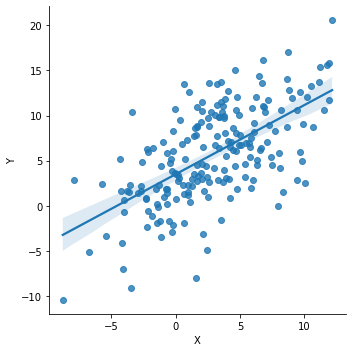

In [15]:
sns.lmplot(x="X", y="Y", data=fakeData1)

We estimate a strong relationship between X and Y, but we know in fact that X and Y do not depend on each other in reality. Instead it is the "lurking" variable Z that causes the relationship. 

But if we *control* for Z in our regression:

In [17]:
as_mod3 = smf.ols(formula='Y~X + Z', data=fakeData1).fit()

In [18]:
as_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     259.4
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           6.43e-56
Time:                        13:42:37   Log-Likelihood:                -486.89
No. Observations:                 200   AIC:                             979.8
Df Residuals:                     197   BIC:                             989.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1078      0.258     19.780      0.000       4.599       5.617
X              0.0191      0.066      0.287      0.774      -0.112       0.150
Z              0.4624      0.029     15.727      0.000       0.404       0.520
==============================================================================
Omnibus:                        2.440   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.054
Skew:                          -0.185   Prob(JB):                        0.358
Kurtosis:                       3.330   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now the relationship between X and Y is estimated closer to 0 and is not estimated to be significantly different that 0. 

### 3.)  Monte Carlo Experiment
  
Let us say we have data on 10 recent graduates from a Norwegian business school who have gone to work at a consulting company. The company has a first-year associate review where associates are graded on a scale from 1 to 10 on a series of evaluations. The company also has the business school GPA (grade point average) from 1 to 5. 

The data for these 10 students: GPA (X) and first-year evaluation (Y) is generated below: 

In [17]:
#initial 
n=10
a= 5

sigma = 1.5

b=.5
x = spt.uniform.rvs(1,4,n,random_state=4321)

epsilon = spt.norm.rvs(0,sigma,n,random_state=1234)

y=a+b*x + epsilon

gpaFakeData = pd.DataFrame({"x":x, "y":y})

In [18]:
print("x", x)
print("y", y)

x [1.2832115  4.26025604 4.07161984 2.14541801 1.77237725 4.91564884
 2.62491485 4.03107147 1.35660706 2.23953387]
y [6.3487585  5.34366448 9.18487037 5.60373116 4.80530552 8.78856883
 7.60184005 6.06075048 5.70184809 2.7557395 ]


In [19]:
as_mod4 = smf.ols(formula='y~x', data=gpaFakeData).fit()
as_mod4.summary()

/Users/johannesmauritzen/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     2.944
Date:                Mon, 10 Oct 2022   Prob (F-statistic):              0.125
Time:                        11:33:39   Log-Likelihood:                -18.556
No. Observations:                  10   AIC:                             41.11
Df Residuals:                       8   BIC:                             41.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0833      1.360      3.002      0.017       0.947       7.219
x              0.7443      0.434      1.716      0.125      -0.256       1.745
==============================================================================
Omnibus:                        0.874   Durbin-Watson:                   2.356
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.725
Skew:                          -0.507   Prob(JB):                        0.696
Kurtosis:                       2.156   Cond. No.                         8.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
nsim = 1000

b_hats = []
cover_95 = []

for s in range(nsim):  
    epsilon = spt.norm.rvs(0,sigma,n)
 # the epsilon part of the fake data is now within the loop, 
    #so we create a new dataset in each loop. 
    y=a+b*x + epsilon
    fakeDF = pd.DataFrame({"x":x, "y":y})
    as_mod4 = smf.ols(formula = "y~x", data=fakeDF).fit()
    b_hat = as_mod4.params[1]
    b_hats.append(b_hat) # save a list of all our estimated b's
    CI_b = as_mod4.conf_int().iloc[1, :] #We take a short cut of just getting the CI from the model object
    cover_95.append(int((b>CI_b[0]) & (b<CI_b[1])))
    
   

In [22]:
cover_95 = np.array(cover_95)
cover_95.mean()

0.959

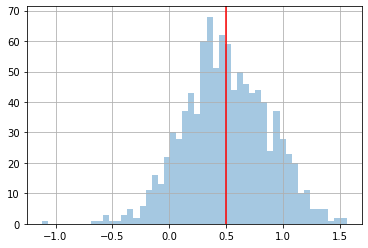

In [24]:
b_hats = pd.Series(b_hats)
fig, ax = plt.subplots()
b_hats.hist(ax=ax, bins=50, alpha=.4)
ax.axvline(x=b, color="red")

### 4.) Manual OLS

Run the regression from assignment 1, but now manually calculate the estimates for b, a and $\sigma$

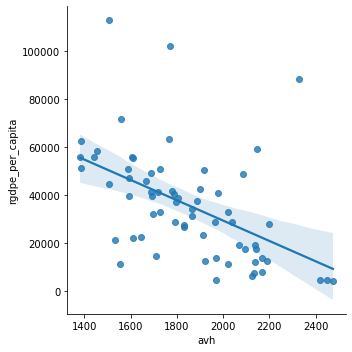

In [25]:
sns.lmplot(x="avh", y="rgdpe_per_capita", data=pwt2019)

In [26]:
n = pwt2019["avh"].count()

pwt2019 = pwt2019.loc[(pwt2019.avh.notna()) & (pwt2019.rgdpe_per_capita.notna()), ]

b_hat = np.cov(pwt2019["avh"],pwt2019["rgdpe_per_capita"], ddof=1)[0,1]/np.var(pwt2019["avh"], ddof=1)


a_hat = np.mean(pwt2019["rgdpe_per_capita"]) - b_hat*np.mean(pwt2019["avh"])



y_hat = a_hat + b_hat*np.mean(pwt2019["avh"])

sigma_hat = np.sqrt(np.sum((pwt2019["rgdpe_per_capita"]-y_hat)**2)/n-2)
                              
print("a-hat", a_hat)
print("b-hat", b_hat) 
print("sigma-hat, sigma_hat")
   

a-hat 114221.65253311764
b-hat -42.361747336876576
sigma-hat, sigma_hat
